In [ ]:
from choreo_k.movenet_detector import Detector, Detection
from choreo_k.modify import interpolate_missing_poses, trim_empty_frames_start_end
from choreo_k.matrixify import get_normalized_coords, matrixify_pose, normalize_and_compare_poses_cosine
from choreo_k.visualize import viz_dist_matrices
from choreo_k.analyze import correlate_time_series

import pickle

%matplotlib inline

/Users/pmb/anaconda3/envs/py39/lib/python3.9/site-packages/openpifpaf/visualizer/base.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Oranges").copy()
  matplotlib.cm.get_cmap('Oranges').set_bad('white', alpha=0.5)
/Users/pmb/anaconda3/envs/py39/lib/python3.9/site-packages/openpifpaf/visualizer/base.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  matplotlib.cm.get_cmap('Blues').set_bad('white', alpha=0.5)
/Users/pmb/anaconda3/envs/py39/lib/python3.9/site-packages/openpifpa

In [ ]:
teddy = Detector()

In [ ]:
teddy.init_model()

Loading saved single-pose movenet thunder model


2021-11-04 19:22:38.975121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
pose_capture = teddy.detect_video("../tiktok/Lisa_Rhee_Dance_Cover_Permission_to_Dance_trimmed-QZ2lKuqwWJY.mp4", write_images=False, images_too=False)
interpolated_capture = interpolate_missing_poses(pose_capture, threshold=.2)
trimmed_capture = trim_empty_frames_start_end(interpolated_capture)
pickle.dump(trimmed_capture, open("../tiktok/pose_data/Lisa_Rhee.p", "wb"))

total frames in video: 6545
video FPS: 29.969273672101192


2021-11-04 19:24:15.943569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 0
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 1
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 2
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 3
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 4
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 5
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 6
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 7
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 8
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 9
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 10
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 11
LOOKING FORE AND AFT FOR ALTERNATIVE TO FRAME 6293


In [ ]:
trimmed_capture = pickle.load(open("../tiktok/pose_data/boymeetsale.p", "rb"))

In [ ]:
trimmed_capture[21]['figures'][0].data

array([[3.8777902e+02, 2.7558295e+02, 5.5995858e-01],
       [3.8142374e+02, 2.8803598e+02, 7.1154374e-01],
       [3.7592697e+02, 2.7128027e+02, 5.3749967e-01],
       [3.9612607e+02, 3.1259180e+02, 8.3733952e-01],
       [3.8620740e+02, 2.6976193e+02, 5.3975821e-01],
       [4.4822324e+02, 3.4362973e+02, 7.8770179e-01],
       [4.4226630e+02, 2.2668996e+02, 6.6278446e-01],
       [5.3094257e+02, 3.6978000e+02, 7.2021258e-01],
       [5.1091663e+02, 1.9076862e+02, 6.9871432e-01],
       [5.0141080e+02, 3.9392133e+02, 5.5993164e-01],
       [4.9257227e+02, 1.7075056e+02, 5.7064295e-01],
       [6.0048413e+02, 3.2762271e+02, 8.2029808e-01],
       [6.0473877e+02, 2.5334915e+02, 7.6977986e-01],
       [7.5107574e+02, 3.8725043e+02, 7.6115513e-01],
       [7.4487073e+02, 1.8705054e+02, 7.7178109e-01],
       [8.6117603e+02, 4.2249057e+02, 8.7952590e-01],
       [8.5267230e+02, 1.5820543e+02, 8.3647788e-01]], dtype=float32)

In [ ]:
p1_normalized_coords = Detection(get_normalized_coords(trimmed_capture[21]))
print(p1_normalized_coords.data)

p2_normalized_coords = Detection(get_normalized_coords(trimmed_capture[81]))
print(p2_normalized_coords.data)
# l2_normalized_coords = Detection(normalize_pose(trimmed_capture[21]['figures'][0].data, norm='l2'))
# print(l2_normalized_coords.data)

[[0.20709784 0.24187313 0.5272389 ]
 [0.20332472 0.24531251 0.56183803]
 [0.20214042 0.23912592 0.5840809 ]
 [0.20685592 0.25145447 0.6033232 ]
 [0.20589456 0.23428665 0.57179445]
 [0.22377774 0.25600097 0.5470638 ]
 [0.2198562  0.23105739 0.59731126]
 [0.24180968 0.2601466  0.3024994 ]
 [0.23503868 0.22332656 0.3518113 ]
 [0.24513133 0.2551871  0.31330207]
 [0.23511246 0.22885156 0.26480368]
 [0.2570311  0.24742837 0.5214199 ]
 [0.25609338 0.23185273 0.4270692 ]
 [0.2743629  0.25204757 0.5180743 ]
 [0.2719213  0.23008323 0.4373738 ]
 [0.30498314 0.2527517  0.48316824]
 [0.2972398  0.23816723 0.39397395]]
[[0.21152799 0.24297358 0.5902367 ]
 [0.20661607 0.24642242 0.44778994]
 [0.20569938 0.23894621 0.4507553 ]
 [0.20923848 0.2502739  0.49776888]
 [0.20816298 0.23252545 0.5315146 ]
 [0.21587676 0.25370023 0.37855652]
 [0.21957453 0.22673683 0.47195363]
 [0.23420523 0.26242226 0.2841153 ]
 [0.23870519 0.22224961 0.28098667]
 [0.22079542 0.26014805 0.30023313]
 [0.24488144 0.22940196 0.2

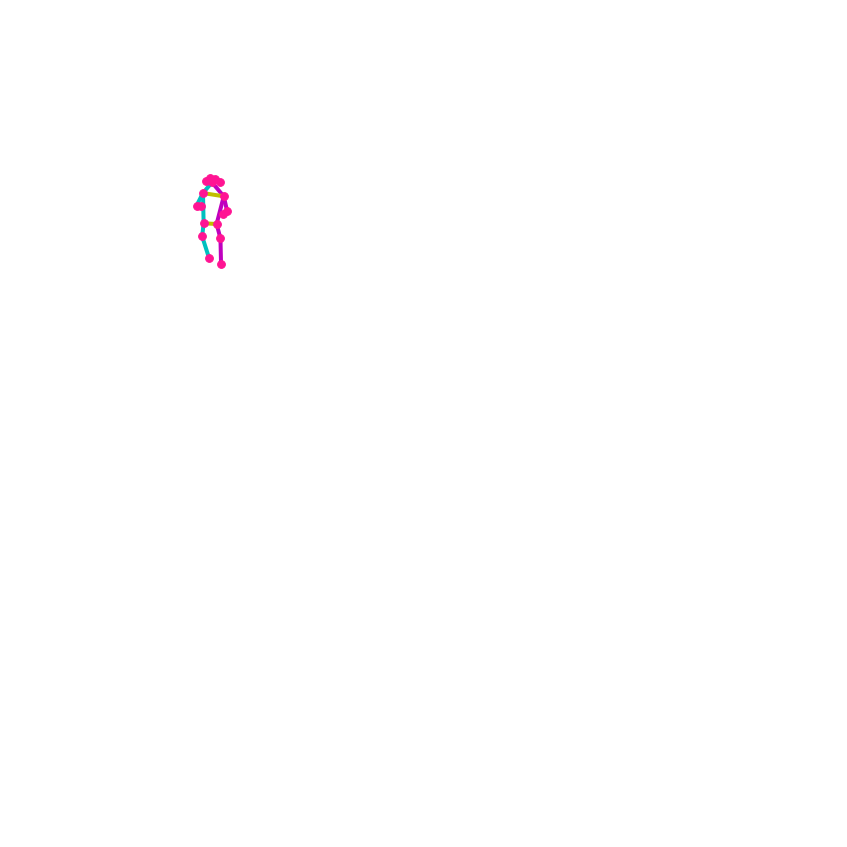

In [ ]:
teddy.visualize_detections([p1_normalized_coords], normalized=True)

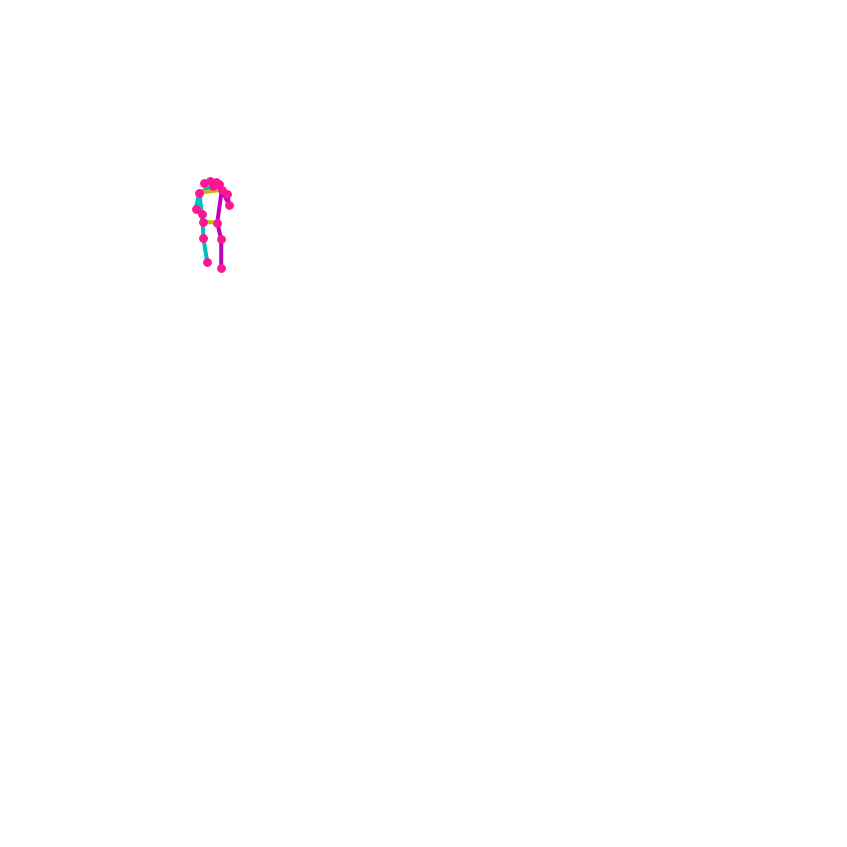

In [ ]:
teddy.visualize_detections([p2_normalized_coords], normalized=True)

In [ ]:
normalize_and_compare_poses_cosine(trimmed_capture[21], trimmed_capture[81])

0.9997493624687195

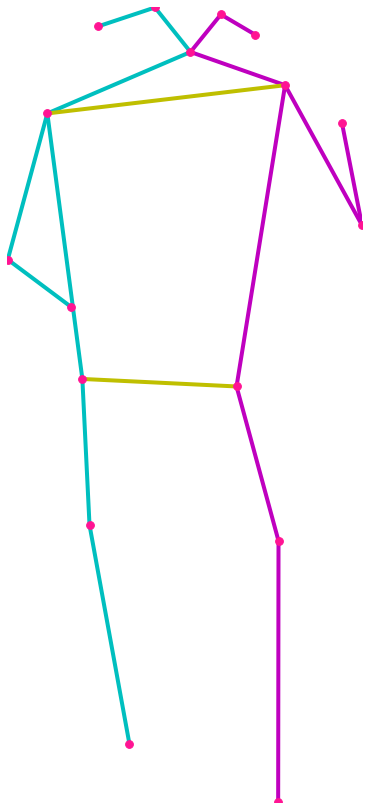

In [ ]:
teddy.visualize_detections(trimmed_capture[81]['figures']) #, pose_capture[20]['image'])

In [ ]:
cosine_similarities = correlate_time_series(trimmed_capture, trimmed_capture, method='distance')

Comparing frame 0 to the rest
Comparing frame 1 to the rest
Comparing frame 2 to the rest
Comparing frame 3 to the rest
Comparing frame 4 to the rest
Comparing frame 5 to the rest
Comparing frame 6 to the rest
Comparing frame 7 to the rest
Comparing frame 8 to the rest
Comparing frame 9 to the rest
Comparing frame 10 to the rest
Comparing frame 11 to the rest
Comparing frame 12 to the rest
Comparing frame 13 to the rest
Comparing frame 14 to the rest
Comparing frame 15 to the rest
Comparing frame 16 to the rest
Comparing frame 17 to the rest
Comparing frame 18 to the rest
Comparing frame 19 to the rest
Comparing frame 20 to the rest
Comparing frame 21 to the rest
Comparing frame 22 to the rest
Comparing frame 23 to the rest
Comparing frame 24 to the rest
Comparing frame 25 to the rest
Comparing frame 26 to the rest
Comparing frame 27 to the rest
Comparing frame 28 to the rest
Comparing frame 29 to the rest
Comparing frame 30 to the rest
Comparing frame 31 to the rest
Comparing frame 32

Comparing frame 260 to the rest
Comparing frame 261 to the rest
Comparing frame 262 to the rest
Comparing frame 263 to the rest
Comparing frame 264 to the rest
Comparing frame 265 to the rest
Comparing frame 266 to the rest
Comparing frame 267 to the rest
Comparing frame 268 to the rest
Comparing frame 269 to the rest
Comparing frame 270 to the rest
Comparing frame 271 to the rest
Comparing frame 272 to the rest
Comparing frame 273 to the rest
Comparing frame 274 to the rest
Comparing frame 275 to the rest
Comparing frame 276 to the rest
Comparing frame 277 to the rest
Comparing frame 278 to the rest
Comparing frame 279 to the rest
Comparing frame 280 to the rest
Comparing frame 281 to the rest
Comparing frame 282 to the rest
Comparing frame 283 to the rest
Comparing frame 284 to the rest
Comparing frame 285 to the rest
Comparing frame 286 to the rest
Comparing frame 287 to the rest
Comparing frame 288 to the rest
Comparing frame 289 to the rest
Comparing frame 290 to the rest
Comparin

Comparing frame 517 to the rest
Comparing frame 518 to the rest
Comparing frame 519 to the rest
Comparing frame 520 to the rest
Comparing frame 521 to the rest
Comparing frame 522 to the rest
Comparing frame 523 to the rest
Comparing frame 524 to the rest
Comparing frame 525 to the rest
Comparing frame 526 to the rest
Comparing frame 527 to the rest
Comparing frame 528 to the rest
Comparing frame 529 to the rest
Comparing frame 530 to the rest
Comparing frame 531 to the rest
Comparing frame 532 to the rest
Comparing frame 533 to the rest
Comparing frame 534 to the rest
Comparing frame 535 to the rest
Comparing frame 536 to the rest
Comparing frame 537 to the rest
Comparing frame 538 to the rest
Comparing frame 539 to the rest
Comparing frame 540 to the rest
Comparing frame 541 to the rest
Comparing frame 542 to the rest
Comparing frame 543 to the rest
Comparing frame 544 to the rest
Comparing frame 545 to the rest
Comparing frame 546 to the rest
Comparing frame 547 to the rest
Comparin

Comparing frame 774 to the rest
Comparing frame 775 to the rest
Comparing frame 776 to the rest
Comparing frame 777 to the rest
Comparing frame 778 to the rest
Comparing frame 779 to the rest
Comparing frame 780 to the rest
Comparing frame 781 to the rest
Comparing frame 782 to the rest
Comparing frame 783 to the rest
Comparing frame 784 to the rest
Comparing frame 785 to the rest
Comparing frame 786 to the rest
Comparing frame 787 to the rest
Comparing frame 788 to the rest
Comparing frame 789 to the rest
Comparing frame 790 to the rest
Comparing frame 791 to the rest
Comparing frame 792 to the rest
Comparing frame 793 to the rest
Comparing frame 794 to the rest
Comparing frame 795 to the rest
Comparing frame 796 to the rest
Comparing frame 797 to the rest
Comparing frame 798 to the rest
Comparing frame 799 to the rest
Comparing frame 800 to the rest
Comparing frame 801 to the rest
Comparing frame 802 to the rest
Comparing frame 803 to the rest
Comparing frame 804 to the rest
Comparin

Comparing frame 1030 to the rest
Comparing frame 1031 to the rest
Comparing frame 1032 to the rest
Comparing frame 1033 to the rest
Comparing frame 1034 to the rest
Comparing frame 1035 to the rest
Comparing frame 1036 to the rest
Comparing frame 1037 to the rest
Comparing frame 1038 to the rest
Comparing frame 1039 to the rest
Comparing frame 1040 to the rest
Comparing frame 1041 to the rest
Comparing frame 1042 to the rest
Comparing frame 1043 to the rest
Comparing frame 1044 to the rest
Comparing frame 1045 to the rest
Comparing frame 1046 to the rest
Comparing frame 1047 to the rest
Comparing frame 1048 to the rest
Comparing frame 1049 to the rest
Comparing frame 1050 to the rest
Comparing frame 1051 to the rest
Comparing frame 1052 to the rest
Comparing frame 1053 to the rest
Comparing frame 1054 to the rest
Comparing frame 1055 to the rest
Comparing frame 1056 to the rest
Comparing frame 1057 to the rest
Comparing frame 1058 to the rest
Comparing frame 1059 to the rest
Comparing 

Comparing frame 1279 to the rest
Comparing frame 1280 to the rest
Comparing frame 1281 to the rest
Comparing frame 1282 to the rest
Comparing frame 1283 to the rest
Comparing frame 1284 to the rest
Comparing frame 1285 to the rest
Comparing frame 1286 to the rest
Comparing frame 1287 to the rest
Comparing frame 1288 to the rest
Comparing frame 1289 to the rest
Comparing frame 1290 to the rest
Comparing frame 1291 to the rest
Comparing frame 1292 to the rest
Comparing frame 1293 to the rest
Comparing frame 1294 to the rest
Comparing frame 1295 to the rest
Comparing frame 1296 to the rest
Comparing frame 1297 to the rest
Comparing frame 1298 to the rest
Comparing frame 1299 to the rest
Comparing frame 1300 to the rest
Comparing frame 1301 to the rest
Comparing frame 1302 to the rest
Comparing frame 1303 to the rest
Comparing frame 1304 to the rest
Comparing frame 1305 to the rest
Comparing frame 1306 to the rest
Comparing frame 1307 to the rest
Comparing frame 1308 to the rest
Comparing 

Comparing frame 1528 to the rest
Comparing frame 1529 to the rest
Comparing frame 1530 to the rest
Comparing frame 1531 to the rest
Comparing frame 1532 to the rest
Comparing frame 1533 to the rest
Comparing frame 1534 to the rest
Comparing frame 1535 to the rest
Comparing frame 1536 to the rest
Comparing frame 1537 to the rest
Comparing frame 1538 to the rest
Comparing frame 1539 to the rest
Comparing frame 1540 to the rest
Comparing frame 1541 to the rest
Comparing frame 1542 to the rest
Comparing frame 1543 to the rest
Comparing frame 1544 to the rest
Comparing frame 1545 to the rest
Comparing frame 1546 to the rest
Comparing frame 1547 to the rest
Comparing frame 1548 to the rest
Comparing frame 1549 to the rest
Comparing frame 1550 to the rest
Comparing frame 1551 to the rest
Comparing frame 1552 to the rest
Comparing frame 1553 to the rest
Comparing frame 1554 to the rest
Comparing frame 1555 to the rest
Comparing frame 1556 to the rest
Comparing frame 1557 to the rest
Comparing 

Comparing frame 1777 to the rest
Comparing frame 1778 to the rest
Comparing frame 1779 to the rest
Comparing frame 1780 to the rest
Comparing frame 1781 to the rest
Comparing frame 1782 to the rest
Comparing frame 1783 to the rest
Comparing frame 1784 to the rest
Comparing frame 1785 to the rest
Comparing frame 1786 to the rest
Comparing frame 1787 to the rest
Comparing frame 1788 to the rest
Comparing frame 1789 to the rest
Comparing frame 1790 to the rest
Comparing frame 1791 to the rest
Comparing frame 1792 to the rest
Comparing frame 1793 to the rest
Comparing frame 1794 to the rest
Comparing frame 1795 to the rest
Comparing frame 1796 to the rest
Comparing frame 1797 to the rest
Comparing frame 1798 to the rest
Comparing frame 1799 to the rest
Comparing frame 1800 to the rest
Comparing frame 1801 to the rest
Comparing frame 1802 to the rest
Comparing frame 1803 to the rest
Comparing frame 1804 to the rest
Comparing frame 1805 to the rest
Comparing frame 1806 to the rest
Comparing 

Comparing frame 2026 to the rest
Comparing frame 2027 to the rest
Comparing frame 2028 to the rest
Comparing frame 2029 to the rest
Comparing frame 2030 to the rest
Comparing frame 2031 to the rest
Comparing frame 2032 to the rest
Comparing frame 2033 to the rest
Comparing frame 2034 to the rest
Comparing frame 2035 to the rest
Comparing frame 2036 to the rest
Comparing frame 2037 to the rest
Comparing frame 2038 to the rest
Comparing frame 2039 to the rest
Comparing frame 2040 to the rest
Comparing frame 2041 to the rest
Comparing frame 2042 to the rest
Comparing frame 2043 to the rest
Comparing frame 2044 to the rest
Comparing frame 2045 to the rest
Comparing frame 2046 to the rest
Comparing frame 2047 to the rest
Comparing frame 2048 to the rest
Comparing frame 2049 to the rest
Comparing frame 2050 to the rest
Comparing frame 2051 to the rest
Comparing frame 2052 to the rest
Comparing frame 2053 to the rest
Comparing frame 2054 to the rest
Comparing frame 2055 to the rest
Comparing 

Comparing frame 2275 to the rest
Comparing frame 2276 to the rest
Comparing frame 2277 to the rest
Comparing frame 2278 to the rest
Comparing frame 2279 to the rest
Comparing frame 2280 to the rest
Comparing frame 2281 to the rest
Comparing frame 2282 to the rest
Comparing frame 2283 to the rest
Comparing frame 2284 to the rest
Comparing frame 2285 to the rest
Comparing frame 2286 to the rest
Comparing frame 2287 to the rest
Comparing frame 2288 to the rest
Comparing frame 2289 to the rest
Comparing frame 2290 to the rest
Comparing frame 2291 to the rest
Comparing frame 2292 to the rest
Comparing frame 2293 to the rest
Comparing frame 2294 to the rest
Comparing frame 2295 to the rest
Comparing frame 2296 to the rest
Comparing frame 2297 to the rest
Comparing frame 2298 to the rest
Comparing frame 2299 to the rest
Comparing frame 2300 to the rest
Comparing frame 2301 to the rest
Comparing frame 2302 to the rest
Comparing frame 2303 to the rest
Comparing frame 2304 to the rest
Comparing 

Comparing frame 2524 to the rest
Comparing frame 2525 to the rest
Comparing frame 2526 to the rest
Comparing frame 2527 to the rest
Comparing frame 2528 to the rest
Comparing frame 2529 to the rest
Comparing frame 2530 to the rest
Comparing frame 2531 to the rest
Comparing frame 2532 to the rest
Comparing frame 2533 to the rest
Comparing frame 2534 to the rest
Comparing frame 2535 to the rest
Comparing frame 2536 to the rest
Comparing frame 2537 to the rest
Comparing frame 2538 to the rest
Comparing frame 2539 to the rest
Comparing frame 2540 to the rest
Comparing frame 2541 to the rest
Comparing frame 2542 to the rest
Comparing frame 2543 to the rest
Comparing frame 2544 to the rest
Comparing frame 2545 to the rest
Comparing frame 2546 to the rest
Comparing frame 2547 to the rest
Comparing frame 2548 to the rest
Comparing frame 2549 to the rest
Comparing frame 2550 to the rest
Comparing frame 2551 to the rest
Comparing frame 2552 to the rest
Comparing frame 2553 to the rest
Comparing 

Comparing frame 2773 to the rest
Comparing frame 2774 to the rest
Comparing frame 2775 to the rest
Comparing frame 2776 to the rest
Comparing frame 2777 to the rest
Comparing frame 2778 to the rest
Comparing frame 2779 to the rest
Comparing frame 2780 to the rest
Comparing frame 2781 to the rest
Comparing frame 2782 to the rest
Comparing frame 2783 to the rest
Comparing frame 2784 to the rest
Comparing frame 2785 to the rest
Comparing frame 2786 to the rest
Comparing frame 2787 to the rest
Comparing frame 2788 to the rest
Comparing frame 2789 to the rest
Comparing frame 2790 to the rest
Comparing frame 2791 to the rest
Comparing frame 2792 to the rest
Comparing frame 2793 to the rest
Comparing frame 2794 to the rest
Comparing frame 2795 to the rest
Comparing frame 2796 to the rest
Comparing frame 2797 to the rest
Comparing frame 2798 to the rest
Comparing frame 2799 to the rest
Comparing frame 2800 to the rest
Comparing frame 2801 to the rest
Comparing frame 2802 to the rest
Comparing 

Comparing frame 3022 to the rest
Comparing frame 3023 to the rest
Comparing frame 3024 to the rest
Comparing frame 3025 to the rest
Comparing frame 3026 to the rest
Comparing frame 3027 to the rest
Comparing frame 3028 to the rest
Comparing frame 3029 to the rest
Comparing frame 3030 to the rest
Comparing frame 3031 to the rest
Comparing frame 3032 to the rest
Comparing frame 3033 to the rest
Comparing frame 3034 to the rest
Comparing frame 3035 to the rest
Comparing frame 3036 to the rest
Comparing frame 3037 to the rest
Comparing frame 3038 to the rest
Comparing frame 3039 to the rest
Comparing frame 3040 to the rest
Comparing frame 3041 to the rest
Comparing frame 3042 to the rest
Comparing frame 3043 to the rest
Comparing frame 3044 to the rest
Comparing frame 3045 to the rest
Comparing frame 3046 to the rest
Comparing frame 3047 to the rest
Comparing frame 3048 to the rest
Comparing frame 3049 to the rest
Comparing frame 3050 to the rest
Comparing frame 3051 to the rest
Comparing 

Comparing frame 3271 to the rest
Comparing frame 3272 to the rest
Comparing frame 3273 to the rest
Comparing frame 3274 to the rest
Comparing frame 3275 to the rest
Comparing frame 3276 to the rest
Comparing frame 3277 to the rest
Comparing frame 3278 to the rest
Comparing frame 3279 to the rest
Comparing frame 3280 to the rest
Comparing frame 3281 to the rest
Comparing frame 3282 to the rest
Comparing frame 3283 to the rest
Comparing frame 3284 to the rest
Comparing frame 3285 to the rest
Comparing frame 3286 to the rest
Comparing frame 3287 to the rest
Comparing frame 3288 to the rest
Comparing frame 3289 to the rest
Comparing frame 3290 to the rest
Comparing frame 3291 to the rest
Comparing frame 3292 to the rest
Comparing frame 3293 to the rest
Comparing frame 3294 to the rest
Comparing frame 3295 to the rest
Comparing frame 3296 to the rest
Comparing frame 3297 to the rest
Comparing frame 3298 to the rest
Comparing frame 3299 to the rest
Comparing frame 3300 to the rest
Comparing 

Comparing frame 3520 to the rest
Comparing frame 3521 to the rest
Comparing frame 3522 to the rest
Comparing frame 3523 to the rest
Comparing frame 3524 to the rest
Comparing frame 3525 to the rest
Comparing frame 3526 to the rest
Comparing frame 3527 to the rest
Comparing frame 3528 to the rest
Comparing frame 3529 to the rest
Comparing frame 3530 to the rest
Comparing frame 3531 to the rest
Comparing frame 3532 to the rest
Comparing frame 3533 to the rest
Comparing frame 3534 to the rest
Comparing frame 3535 to the rest
Comparing frame 3536 to the rest
Comparing frame 3537 to the rest
Comparing frame 3538 to the rest
Comparing frame 3539 to the rest
Comparing frame 3540 to the rest
Comparing frame 3541 to the rest
Comparing frame 3542 to the rest
Comparing frame 3543 to the rest
Comparing frame 3544 to the rest
Comparing frame 3545 to the rest
Comparing frame 3546 to the rest
Comparing frame 3547 to the rest
Comparing frame 3548 to the rest
Comparing frame 3549 to the rest
Comparing 

Comparing frame 3769 to the rest
Comparing frame 3770 to the rest
Comparing frame 3771 to the rest
Comparing frame 3772 to the rest
Comparing frame 3773 to the rest
Comparing frame 3774 to the rest
Comparing frame 3775 to the rest
Comparing frame 3776 to the rest
Comparing frame 3777 to the rest
Comparing frame 3778 to the rest
Comparing frame 3779 to the rest
Comparing frame 3780 to the rest
Comparing frame 3781 to the rest
Comparing frame 3782 to the rest
Comparing frame 3783 to the rest
Comparing frame 3784 to the rest
Comparing frame 3785 to the rest
Comparing frame 3786 to the rest
Comparing frame 3787 to the rest
Comparing frame 3788 to the rest
Comparing frame 3789 to the rest
Comparing frame 3790 to the rest
Comparing frame 3791 to the rest
Comparing frame 3792 to the rest
Comparing frame 3793 to the rest
Comparing frame 3794 to the rest
Comparing frame 3795 to the rest
Comparing frame 3796 to the rest
Comparing frame 3797 to the rest
Comparing frame 3798 to the rest
Comparing 

Comparing frame 4018 to the rest
Comparing frame 4019 to the rest
Comparing frame 4020 to the rest
Comparing frame 4021 to the rest
Comparing frame 4022 to the rest
Comparing frame 4023 to the rest
Comparing frame 4024 to the rest
Comparing frame 4025 to the rest
Comparing frame 4026 to the rest
Comparing frame 4027 to the rest
Comparing frame 4028 to the rest
Comparing frame 4029 to the rest
Comparing frame 4030 to the rest
Comparing frame 4031 to the rest
Comparing frame 4032 to the rest
Comparing frame 4033 to the rest
Comparing frame 4034 to the rest
Comparing frame 4035 to the rest
Comparing frame 4036 to the rest
Comparing frame 4037 to the rest
Comparing frame 4038 to the rest
Comparing frame 4039 to the rest
Comparing frame 4040 to the rest
Comparing frame 4041 to the rest
Comparing frame 4042 to the rest
Comparing frame 4043 to the rest
Comparing frame 4044 to the rest
Comparing frame 4045 to the rest
Comparing frame 4046 to the rest
Comparing frame 4047 to the rest
Comparing 

Comparing frame 4267 to the rest
Comparing frame 4268 to the rest
Comparing frame 4269 to the rest
Comparing frame 4270 to the rest
Comparing frame 4271 to the rest
Comparing frame 4272 to the rest
Comparing frame 4273 to the rest
Comparing frame 4274 to the rest
Comparing frame 4275 to the rest
Comparing frame 4276 to the rest
Comparing frame 4277 to the rest
Comparing frame 4278 to the rest
Comparing frame 4279 to the rest
Comparing frame 4280 to the rest
Comparing frame 4281 to the rest
Comparing frame 4282 to the rest
Comparing frame 4283 to the rest
Comparing frame 4284 to the rest
Comparing frame 4285 to the rest
Comparing frame 4286 to the rest
Comparing frame 4287 to the rest
Comparing frame 4288 to the rest
Comparing frame 4289 to the rest
Comparing frame 4290 to the rest
Comparing frame 4291 to the rest
Comparing frame 4292 to the rest
Comparing frame 4293 to the rest
Comparing frame 4294 to the rest
Comparing frame 4295 to the rest
Comparing frame 4296 to the rest
Comparing 

Comparing frame 4516 to the rest
Comparing frame 4517 to the rest
Comparing frame 4518 to the rest
Comparing frame 4519 to the rest
Comparing frame 4520 to the rest
Comparing frame 4521 to the rest
Comparing frame 4522 to the rest
Comparing frame 4523 to the rest
Comparing frame 4524 to the rest
Comparing frame 4525 to the rest
Comparing frame 4526 to the rest
Comparing frame 4527 to the rest
Comparing frame 4528 to the rest
Comparing frame 4529 to the rest
Comparing frame 4530 to the rest
Comparing frame 4531 to the rest
Comparing frame 4532 to the rest
Comparing frame 4533 to the rest
Comparing frame 4534 to the rest
Comparing frame 4535 to the rest
Comparing frame 4536 to the rest
Comparing frame 4537 to the rest
Comparing frame 4538 to the rest
Comparing frame 4539 to the rest
Comparing frame 4540 to the rest
Comparing frame 4541 to the rest
Comparing frame 4542 to the rest
Comparing frame 4543 to the rest
Comparing frame 4544 to the rest
Comparing frame 4545 to the rest
Comparing 

Comparing frame 4765 to the rest
Comparing frame 4766 to the rest
Comparing frame 4767 to the rest
Comparing frame 4768 to the rest
Comparing frame 4769 to the rest
Comparing frame 4770 to the rest
Comparing frame 4771 to the rest
Comparing frame 4772 to the rest
Comparing frame 4773 to the rest
Comparing frame 4774 to the rest
Comparing frame 4775 to the rest
Comparing frame 4776 to the rest
Comparing frame 4777 to the rest
Comparing frame 4778 to the rest
Comparing frame 4779 to the rest
Comparing frame 4780 to the rest
Comparing frame 4781 to the rest
Comparing frame 4782 to the rest
Comparing frame 4783 to the rest
Comparing frame 4784 to the rest
Comparing frame 4785 to the rest
Comparing frame 4786 to the rest
Comparing frame 4787 to the rest
Comparing frame 4788 to the rest
Comparing frame 4789 to the rest
Comparing frame 4790 to the rest
Comparing frame 4791 to the rest
Comparing frame 4792 to the rest
Comparing frame 4793 to the rest
Comparing frame 4794 to the rest
Comparing 

Comparing frame 5014 to the rest
Comparing frame 5015 to the rest
Comparing frame 5016 to the rest
Comparing frame 5017 to the rest
Comparing frame 5018 to the rest
Comparing frame 5019 to the rest
Comparing frame 5020 to the rest
Comparing frame 5021 to the rest
Comparing frame 5022 to the rest
Comparing frame 5023 to the rest
Comparing frame 5024 to the rest
Comparing frame 5025 to the rest
Comparing frame 5026 to the rest
Comparing frame 5027 to the rest
Comparing frame 5028 to the rest
Comparing frame 5029 to the rest
Comparing frame 5030 to the rest
Comparing frame 5031 to the rest
Comparing frame 5032 to the rest
Comparing frame 5033 to the rest
Comparing frame 5034 to the rest
Comparing frame 5035 to the rest
Comparing frame 5036 to the rest
Comparing frame 5037 to the rest
Comparing frame 5038 to the rest
Comparing frame 5039 to the rest
Comparing frame 5040 to the rest
Comparing frame 5041 to the rest
Comparing frame 5042 to the rest
Comparing frame 5043 to the rest
Comparing 

Comparing frame 5263 to the rest
Comparing frame 5264 to the rest
Comparing frame 5265 to the rest
Comparing frame 5266 to the rest
Comparing frame 5267 to the rest
Comparing frame 5268 to the rest
Comparing frame 5269 to the rest
Comparing frame 5270 to the rest
Comparing frame 5271 to the rest
Comparing frame 5272 to the rest
Comparing frame 5273 to the rest
Comparing frame 5274 to the rest
Comparing frame 5275 to the rest
Comparing frame 5276 to the rest
Comparing frame 5277 to the rest
Comparing frame 5278 to the rest
Comparing frame 5279 to the rest
Comparing frame 5280 to the rest
Comparing frame 5281 to the rest
Comparing frame 5282 to the rest
Comparing frame 5283 to the rest
Comparing frame 5284 to the rest
Comparing frame 5285 to the rest
Comparing frame 5286 to the rest
Comparing frame 5287 to the rest
Comparing frame 5288 to the rest
Comparing frame 5289 to the rest
Comparing frame 5290 to the rest
Comparing frame 5291 to the rest
Comparing frame 5292 to the rest
Comparing 

Comparing frame 5512 to the rest
Comparing frame 5513 to the rest
Comparing frame 5514 to the rest
Comparing frame 5515 to the rest
Comparing frame 5516 to the rest
Comparing frame 5517 to the rest
Comparing frame 5518 to the rest
Comparing frame 5519 to the rest
Comparing frame 5520 to the rest
Comparing frame 5521 to the rest
Comparing frame 5522 to the rest
Comparing frame 5523 to the rest
Comparing frame 5524 to the rest
Comparing frame 5525 to the rest
Comparing frame 5526 to the rest
Comparing frame 5527 to the rest
Comparing frame 5528 to the rest
Comparing frame 5529 to the rest
Comparing frame 5530 to the rest
Comparing frame 5531 to the rest
Comparing frame 5532 to the rest
Comparing frame 5533 to the rest
Comparing frame 5534 to the rest
Comparing frame 5535 to the rest
Comparing frame 5536 to the rest
Comparing frame 5537 to the rest
Comparing frame 5538 to the rest
Comparing frame 5539 to the rest
Comparing frame 5540 to the rest
Comparing frame 5541 to the rest
Comparing 

Comparing frame 5761 to the rest
Comparing frame 5762 to the rest
Comparing frame 5763 to the rest
Comparing frame 5764 to the rest
Comparing frame 5765 to the rest
Comparing frame 5766 to the rest
Comparing frame 5767 to the rest
Comparing frame 5768 to the rest
Comparing frame 5769 to the rest
Comparing frame 5770 to the rest
Comparing frame 5771 to the rest
Comparing frame 5772 to the rest
Comparing frame 5773 to the rest
Comparing frame 5774 to the rest
Comparing frame 5775 to the rest
Comparing frame 5776 to the rest
Comparing frame 5777 to the rest
Comparing frame 5778 to the rest
Comparing frame 5779 to the rest
Comparing frame 5780 to the rest
Comparing frame 5781 to the rest
Comparing frame 5782 to the rest
Comparing frame 5783 to the rest
Comparing frame 5784 to the rest
Comparing frame 5785 to the rest
Comparing frame 5786 to the rest
Comparing frame 5787 to the rest
Comparing frame 5788 to the rest
Comparing frame 5789 to the rest
Comparing frame 5790 to the rest
Comparing 

Comparing frame 6010 to the rest
Comparing frame 6011 to the rest
Comparing frame 6012 to the rest
Comparing frame 6013 to the rest
Comparing frame 6014 to the rest
Comparing frame 6015 to the rest
Comparing frame 6016 to the rest
Comparing frame 6017 to the rest
Comparing frame 6018 to the rest
Comparing frame 6019 to the rest
Comparing frame 6020 to the rest
Comparing frame 6021 to the rest
Comparing frame 6022 to the rest
Comparing frame 6023 to the rest
Comparing frame 6024 to the rest
Comparing frame 6025 to the rest
Comparing frame 6026 to the rest
Comparing frame 6027 to the rest
Comparing frame 6028 to the rest
Comparing frame 6029 to the rest
Comparing frame 6030 to the rest
Comparing frame 6031 to the rest
Comparing frame 6032 to the rest
Comparing frame 6033 to the rest
Comparing frame 6034 to the rest
Comparing frame 6035 to the rest
Comparing frame 6036 to the rest
Comparing frame 6037 to the rest
Comparing frame 6038 to the rest
Comparing frame 6039 to the rest
Comparing 

Comparing frame 6259 to the rest
Comparing frame 6260 to the rest
Comparing frame 6261 to the rest
Comparing frame 6262 to the rest
Comparing frame 6263 to the rest
Comparing frame 6264 to the rest
Comparing frame 6265 to the rest
Comparing frame 6266 to the rest
Comparing frame 6267 to the rest
Comparing frame 6268 to the rest
Comparing frame 6269 to the rest
Comparing frame 6270 to the rest
Comparing frame 6271 to the rest
Comparing frame 6272 to the rest
Comparing frame 6273 to the rest
Comparing frame 6274 to the rest
Comparing frame 6275 to the rest
Comparing frame 6276 to the rest
Comparing frame 6277 to the rest
Comparing frame 6278 to the rest
Comparing frame 6279 to the rest
Comparing frame 6280 to the rest
Comparing frame 6281 to the rest
Comparing frame 6282 to the rest
Comparing frame 6283 to the rest
Comparing frame 6284 to the rest
Comparing frame 6285 to the rest
Comparing frame 6286 to the rest
Comparing frame 6287 to the rest
Comparing frame 6288 to the rest
Comparing 

Comparing frame 6508 to the rest
Comparing frame 6509 to the rest
Comparing frame 6510 to the rest
Comparing frame 6511 to the rest
Comparing frame 6512 to the rest
Comparing frame 6513 to the rest
Comparing frame 6514 to the rest
Comparing frame 6515 to the rest
Comparing frame 6516 to the rest
Comparing frame 6517 to the rest
Comparing frame 6518 to the rest
Comparing frame 6519 to the rest
Comparing frame 6520 to the rest
Comparing frame 6521 to the rest
Comparing frame 6522 to the rest
Comparing frame 6523 to the rest
Comparing frame 6524 to the rest
Comparing frame 6525 to the rest
Comparing frame 6526 to the rest
Comparing frame 6527 to the rest
Comparing frame 6528 to the rest
Comparing frame 6529 to the rest
Comparing frame 6530 to the rest
Comparing frame 6531 to the rest
Comparing frame 6532 to the rest


In [ ]:
mantel_similarities = correlate_time_series(trimmed_capture, trimmed_capture)

Comparing frame 0 to the rest
Comparing frame 1 to the rest
Comparing frame 2 to the rest
Comparing frame 3 to the rest
Comparing frame 4 to the rest
Comparing frame 5 to the rest
Comparing frame 6 to the rest
Comparing frame 7 to the rest
Comparing frame 8 to the rest
Comparing frame 9 to the rest
Comparing frame 10 to the rest
Comparing frame 11 to the rest
Comparing frame 12 to the rest
Comparing frame 13 to the rest
Comparing frame 14 to the rest
Comparing frame 15 to the rest
Comparing frame 16 to the rest
Comparing frame 17 to the rest
Comparing frame 18 to the rest
Comparing frame 19 to the rest
Comparing frame 20 to the rest
Comparing frame 21 to the rest
Comparing frame 22 to the rest
Comparing frame 23 to the rest
Comparing frame 24 to the rest
Comparing frame 25 to the rest
Comparing frame 26 to the rest
Comparing frame 27 to the rest
Comparing frame 28 to the rest
Comparing frame 29 to the rest
Comparing frame 30 to the rest
Comparing frame 31 to the rest
Comparing frame 32

KeyboardInterrupt: 

In [ ]:
teddy.visualize_detections(interpolated_capture[1032]['figures'], interpolated_capture[1032]['image'])

In [ ]:
correlations = pickle.load(open("../tiktok/pose_data/fujicov_boymeetsale.corr.p", "rb"))

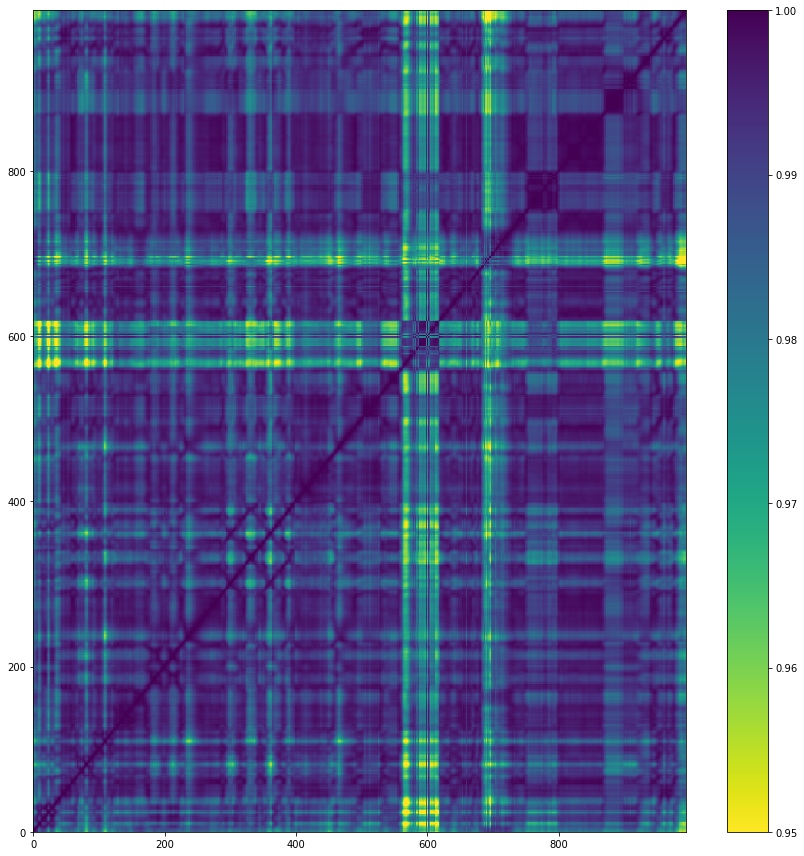

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
#plt.imshow(correlations, cmap='viridis_r', origin='upper')
plt.pcolor(cosine_similarities, cmap='viridis_r', vmin=0.95, vmax=1)
plt.colorbar()
plt.tight_layout()

In [ ]:
pickle.dump(cosine_similarities, open("../tiktok/pose_data/Lisa_Rhee.corr.cosine.p", "wb"))

In [ ]:
alignments = compare_sequences_pairwise(sequence1, sequence2)